In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [4]:
df = pd.read_excel("Airbnb_Open_Data.xlsx", engine='openpyxl')

In [6]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [8]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [9]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [19]:
import pandas as pd

# Drop columns only if they exist
cols_to_drop = ['house_rules', 'license']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# Clean up 'price' and 'service fee' columns
for col in ['price', 'service fee']:
    if col in df.columns:
        df[col] = df[col].astype(str)  # Convert to string for str.replace
        df[col] = df[col].str.replace('$', '', regex=False)
        df[col] = df[col].str.replace(',', '', regex=False)

# Rename columns to indicate dollar values
rename_map = {}
if 'price' in df.columns:
    rename_map['price'] = 'price_$'
if 'service fee' in df.columns:
    rename_map['service fee'] = 'service_fee_$'
df.rename(columns=rename_map, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Convert data types
if 'price_$' in df.columns:
    df['price_$'] = df['price_$'].astype(float)

if 'service_fee_$' in df.columns:
    df['service_fee_$'] = df['service_fee_$'].astype(float)

if 'id' in df.columns:
    df['id'] = df['id'].astype(str)

if 'host id' in df.columns:
    df['host id'] = df['host id'].astype(str)

if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'])

if 'Construction year' in df.columns:
    df['Construction year'] = df['Construction year'].astype(int)

# Correct misspelling of 'brookln'
if 'neighbourhood group' in df.columns:
    df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

# Remove availability outliers
if 'availability 365' in df.columns:
    df = df.drop(df[df['availability 365'] > 500].index)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

In [21]:
df.duplicated().value_counts()

False    83389
Name: count, dtype: int64

In [22]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


In [25]:
# What are the different property types in the dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


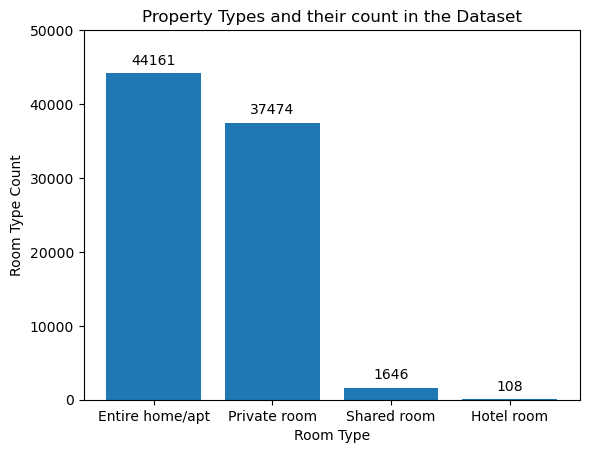

In [24]:
room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"])

plt.bar_label(room_type_bar, labels=property_types.loc[:, "count"], padding=4)
plt.ylim((0, 50000))
plt.xlabel("Room Type")
plt.ylabel("Room Type Count")
plt.title("Property Types and their count in the Dataset")
plt.show()


In [28]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group.columns = ['count']  # Rename column for clarity


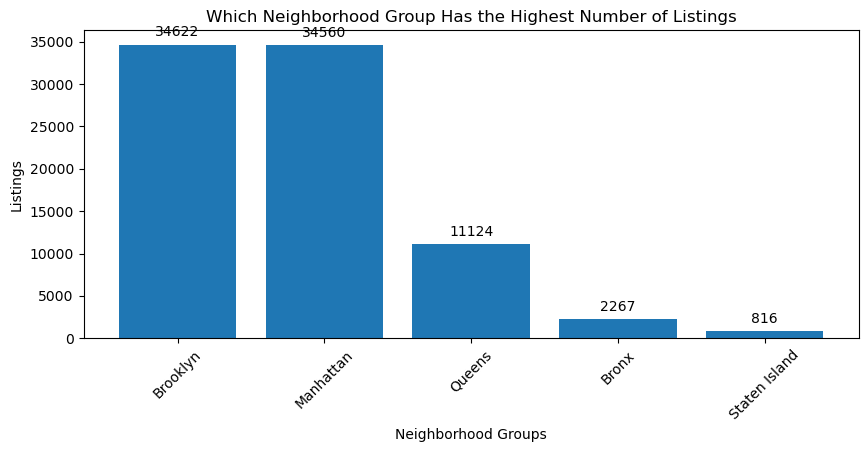

In [27]:
plt.figure(figsize=(10, 4))  # Set figure size before plotting
hood_group_bar = plt.bar(hood_group.index, hood_group['count'])

plt.bar_label(hood_group_bar, labels=hood_group['count'], padding=4)
plt.xlabel('Neighborhood Groups')
plt.ylabel('Listings')
plt.xticks(rotation=45)
plt.title('Which Neighborhood Group Has the Highest Number of Listings')
plt.show()


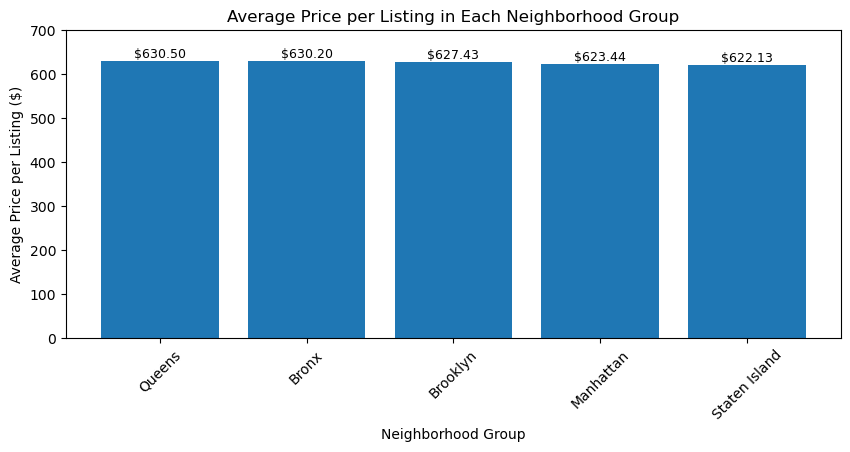

In [32]:
# 📊 Group by neighborhood and calculate average price
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price.columns = ['Average Price']  # Rename for clarity

# 📈 Create bar chart
plt.figure(figsize=(10, 4))
avg_price_bar = plt.bar(avg_price.index, avg_price['Average Price'])

# 🏷️ Add labels to bars
for bar, price in zip(avg_price_bar, avg_price['Average Price']):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             f"${price:.2f}",
             ha='center',
             va='bottom',
             fontsize=9)

# 🧭 Axis labels and title
plt.ylim(0, 700)
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Listing ($)')
plt.xticks(rotation=45)
plt.title('Average Price per Listing in Each Neighborhood Group')

# 🚀 Show the plot
plt.show()

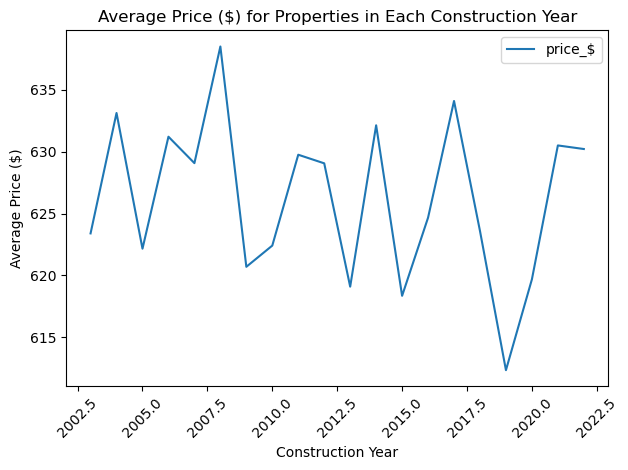

In [34]:
#Is there a relationship between construction year and price?
avg_price_by_year = df.groupby('Construction year')['price_$'].mean().to_frame().plot();
avg_price_by_year.columns = ['Average Price ($)']

#Plot the results
avg_price_by_year.plot(kind='bar', figsize=(12, 5), legend=False)

#Axis labels and title
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for Properties in Each Construction Year')
plt.xticks(rotation=45)

#Show the plot
plt.tight_layout()
plt.show()